In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### 1. A company claims that their email marketing campaign has a 15% click-through rate. If you randomly select 100 people to receive the email, what is the probability that exactly 20 will click through to the website?

$$
P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}
$$

In [5]:
from scipy.stats import binom
from scipy.special import comb
n = 100
x = 20
p = 0.15

prob = binom.pmf(x,n,p)
print(prob)

# P(X=20) = (100 choose 20) * 0.15^20 * 0.85^80
result = comb(n, x, exact=True) * ((p)**x) * (1-p)**(n-x)
print(result)

0.04022449066141772
0.04022449066141756


### 2. A researcher is investigating whether a new medication improves patient outcomes. The medication has a success rate of 75%. If the researcher enrolls 50 patients in the study, what is the probability that fewer than 35 will have a positive outcome?

In [18]:
p = 0.75
n = 50
x = 35
prob = binom.cdf(x,n,p)
print(prob)
result = 0
for i in range(x+1):
    result+= comb(n, i, exact=True) * ((p)**i) * (1-p)**(n-i)
print(result)

0.2519188554772399
0.2519188554772398


### 3. A website offers a premium subscription service with a 20% sign-up rate. If you randomly select 500 visitors to the website, what is the probability that between 90 and 110 will sign up for the premium service?

In [27]:
n = 500
x1 = 90
x2 = 110
p = 0.20

prob1 = binom.cdf(x1-1,n,p)
prob2 = binom.cdf(x2,n,p)
prob2 - prob1

def pxeqlessthank(x, n, p):
    result=0
    for i in range(x+1):
        result += comb(n, i, exact=True) * ((p)**i) * (1-p)**(n-i)
    return result

# P(k1 ≤ X ≤ k2) = P(X ≤ k2) - P(X < k1) = F(k2) - F(k1-1)
print(pxeqlessthank(x2, n, p)-pxeqlessthank(x1-1, n, p))

0.7597481607851779


### 4. A school district is investigating the effectiveness of a new reading program. The program has a success rate of 70%. If the district enrolls 200 students in the program, what is the probability that more than 140 will show significant improvement in reading skills?

In [39]:
p = 0.70
n = 200
x = 140

prob = 1- binom.cdf(x,n,p)
print('probability that more than 140 will show significant improvement in reading skills is ',prob)

def pxequalorlessthanx(x,n,p):
    result = 0
    for i in range(x+1):
        result+= comb(n,i,exact=True)*(p**i)*(1-p)**(n-i)
    return result
print('probability that more than 140 will show significant improvement in reading skills is ',1 - pxequalorlessthanx(x,n,p))

probability that more than 140 will show significant improvement in reading skills is  0.4733474593659296
probability that more than 140 will show significant improvement in reading skills is  0.47334745936592904


### 5. A factory produces electronic components with a defect rate of 5%. If a shipment of 200 components is sent out, what is the probability that fewer than 10 will be defective?

In [43]:
p = 0.05
n = 200
x = 9 

binom.cdf(x,n,p)

0.4547098086808191

### Q-6. A survey shows that 70% of people prefer chocolate ice cream over vanilla ice cream. If you randomly survey one person, what is the probability that they prefer vanilla ice cream?

In [44]:
#in this there is value of n is 1 which represent bernoulli distribution
# probability of success for chocolate ice creame is 0.7 is probab of failure is 0.3 
#  probability of success for vanilla ice creame is 0.3 is probab of failure is 0.7
p = 0.7
print("probability that they prefer vanilla ice cream is",(1-p))

probability that they prefer vanilla ice cream is 0.30000000000000004


### 7. A software company releases a new product with a bug rate of 2%. If 10,000 copies of the product are sold, what is the probability that at least 250 will have a bug?

In [48]:
p = 0.02 # probability of single copy having bug
n = 10000 # num copies sold
x = 250 


# Calculate the probability using the CDF
prob = 1 - binom.cdf(x-1, n, p)

print(f"The probability that at least {x} copies have a bug is {prob:.4f}")

The probability that at least 250 copies have a bug is 0.0003


### 8. According to data from the National Center for Health Statistics (NCHS), the average height for adult men aged 20 years and over in the United States is approximately 69.2 inches with a standard deviation of approximately 2.9 inches. If you randomly select a sample of 50 adult men aged 20 years and over, what is the probability that the sample mean height is greater than 70 inches?

In [55]:
# Lets understand this problem 
# We have population mean height 69.2 and population std 2.9 also we selected sample of 50 people want to find probab
# of sample mean height is greater than 70 inches 
from scipy.stats import norm

mean = 69.2
std = 2.9
n = 50
x = 70
sample_mean = 69.2
sample_std = std/(n**0.5)
# now to find the probability that sample mean height > 70 
z = (x - sample_mean)/sample_std # this will calculate z score value for x = 70 we calculate this because our distribution is normal distribution
probab = norm.cdf(z) # probability of sample mean height less than or equal to 70 is this but we want greater than hence
1- probab

0.025549978630102443

### 9. A company claims that the average salary of its employees is 75,000 with a standard deviation of 10,000. If you randomly select 100 employees, what is the probability that the sample mean salary is less than 72,500?

In [59]:
mean = 75000
std = 10000
n = 100
x = 72500
sample_mean = mean
sample_std = std/(n**0.5)
# now to find the probability that sample mean salary < 72500
z = (x - sample_mean)/sample_std # this will calculate z score value for x = 72500 we calculate this because our distribution is normal distribution
probab = norm.cdf(z) # probability of sample mean salary less than 72500 
probab

0.006209665325776132

### 10. A restaurant claims that the average wait time for a table is 15 minutes with a standard deviation of 3 minutes. If you randomly survey 50 customers, what is the probability that the sample mean wait time is greater than 16 minutes?

In [62]:
mean = 15
std = 3 
n = 50
x = 16
sample_mean = mean
sample_std = std/(n**0.5)
z = (x - sample_mean)/sample_std 
probab = 1- norm.cdf(z) 
probab

0.009211062727049524

### `Q-11`: DataSet Link: https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

* What is the average and standard deviation for the salary in our data set? Show the distribution of the salary (Histogram and kde both).
* Now verify the dataset mean and std from using central limit theorem using following sample and sample size:

    * i. 200 samples of size 30

    * ii. 100 samples of size 50

* Plot samples means distribution and show horizontal line for both mean value: Dataset mean value and means of sample mean.

In [67]:
df = pd.read_csv(r"D:\Jupyter\ds_salaries.csv", index_col = [0])
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [70]:
print("Mean salary of population",df['salary_in_usd'].mean())
print("Std of population",df['salary_in_usd'].std())

Mean salary of population 112297.86985172982
Std of population 70957.25941139569


<AxesSubplot: xlabel='salary_in_usd', ylabel='Density'>

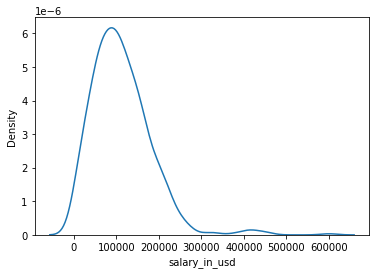

In [71]:
sns.kdeplot(data=df,x='salary_in_usd')

<AxesSubplot: xlabel='salary_in_usd', ylabel='Count'>

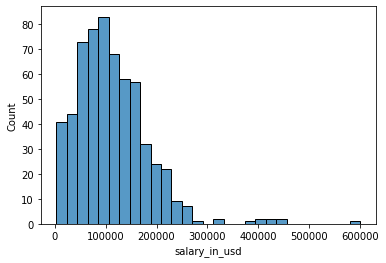

In [72]:
sns.histplot(data=df,x='salary_in_usd')

### Now verify the dataset mean and std from using central limit theorem using following sample and sample size:
#### i. 200 samples of size 30
#### ii. 100 samples of size 50

In [118]:
sample = []
for i in range(200):
    sample.append(df['salary_in_usd'].sample(30).values.tolist())
sample = np.array(sample).mean(axis=1)

In [119]:
print("Mean salary of population",df['salary_in_usd'].mean())
print("Mean salary of sample with 200 samples of size 30 is ",sample.mean())
print("Std of population",df['salary_in_usd'].std()/np.sqrt(30))
print("Std of sample with 200 samples of size 30 is ",sample.std())

Mean salary of population 112297.86985172982
Mean salary of sample with 200 samples of size 30 is  111550.27516666666
Std of population 12954.963866122387
Std of sample with 200 samples of size 30 is  11857.41391659759


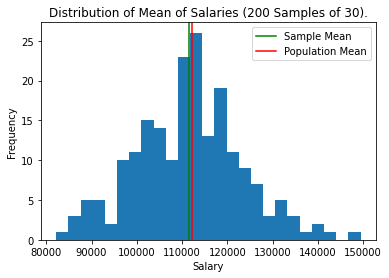

In [120]:
plt.hist(sample,bins=25)
plt.title(f"Distribution of Mean of Salaries ({200} Samples of {30}).")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.axvline(x = np.mean(sample), label = 'Sample Mean', color = 'green')
plt.axvline(x = df["salary_in_usd"].mean(), label = 'Population Mean', color = 'red')
plt.legend(loc = "upper right")
plt.show()

In [121]:
sample = []
for i in range(100):
    sample.append(df['salary_in_usd'].sample(50).values.tolist())
sample = np.array(sample).mean(axis=1)

In [122]:
print("Mean salary of population",df['salary_in_usd'].mean())
print("Mean salary of sample with 200 samples of size 30 is ",sample.mean())
print("Std of population",df['salary_in_usd'].std()/np.sqrt(30))
print("Std of sample with 200 samples of size 30 is ",sample.std())

Mean salary of population 112297.86985172982
Mean salary of sample with 200 samples of size 30 is  112391.04739999998
Std of population 12954.963866122387
Std of sample with 200 samples of size 30 is  9277.092503251934


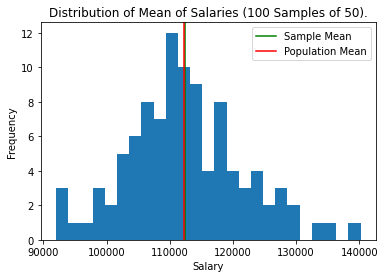

In [123]:
plt.hist(sample,bins=25)
plt.title(f"Distribution of Mean of Salaries ({100} Samples of {50}).")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.axvline(x = np.mean(sample), label = 'Sample Mean', color = 'green')
plt.axvline(x = df["salary_in_usd"].mean(), label = 'Population Mean', color = 'red')
plt.legend(loc = "upper right")
plt.show()